#### Tickers

TECH: Bio-Techne

JNJ: Johnson & Johnson

MRNA: Moderna

PFE: Pfizer

Novavax: NVAX

AZN: Astrazeneca

In [54]:
import pandas as pd
meta = pd.read_csv("datasets_complete/Covid_Companies_Stocks.csv", index_col=False)
meta

,Ticker,Date,Open,High,Low,Close,Trading Volume,Volume Weighted Average Price,Number of Transactions
0,PFE,2020-03-11,30.480,32.000,30.00,30.02,60585686.0,30.6586,307447
1,PFE,2020-03-12,31.270,32.880,30.23,32.71,58156515.0,31.4335,313654
2,PFE,2020-03-15,29.940,32.285,29.65,30.18,48333517.0,30.9841,270185
3,PFE,2020-03-16,31.640,32.650,30.59,32.16,52139745.0,31.6114,317412
4,PFE,2020-03-17,30.770,32.610,30.31,32.36,42228311.0,31.6159,249462
...,...,...,...,...,...,...,...,...,...
2737,NVAX,2021-12-26,168.555,169.390,155.11,157.80,8934203.0,160.0433,159765
2738,NVAX,2021-12-27,153.160,175.990,153.10,155.84,12384643.0,162.9178,185409
2739,NVAX,2021-12-28,153.280,155.280,144.56,153.25,7511780.0,150.6786,111874
2740,NVAX,2021-12-29,152.780,159.000,148.86,154.83,5093321.0,154.1007,82034


In [57]:
df = meta[['Ticker', 'Date', 'Close', 'Number of Transactions']]
df.head()

,Ticker,Date,Close,Number of Transactions
0,PFE,2020-03-11,30.02,307447
1,PFE,2020-03-12,32.71,313654
2,PFE,2020-03-15,30.18,270185
3,PFE,2020-03-16,32.16,317412
4,PFE,2020-03-17,32.36,249462


In [64]:
df_pivot = df.pivot(index=['Date'], columns = ['Ticker'], values = ['Close','Number of Transactions'])
df_pivot.head()

Close                                     Number of Transactions  \
Ticker        AZN   BNTX     JNJ   MRNA   NVAX    PFE                    AZN   
Date                                                                           
2020-03-11  40.76  28.55  125.41  22.30   9.29  30.02                41177.0   
2020-03-12  42.28  30.93  134.29  21.30   8.41  32.71                39042.0   
2020-03-15  37.79  40.00  127.13  26.49   6.91  30.18                52572.0   
2020-03-16  40.93  66.60  136.59  28.18   9.50  32.16                36304.0   
2020-03-17  39.36  92.00  134.96  31.58  10.65  32.36                40658.0   

                                                            
Ticker         BNTX       JNJ      MRNA     NVAX       PFE  
Date                                                        
2020-03-11   1472.0  206500.0   70915.0  29246.0  307447.0  
2020-03-12   1105.0  212588.0   82944.0  29065.0  313654.0  
2020-03-15  22873.0  190231.0  249726.0  26430.0  270185.0  
2020-03-16  39326.0  189503.0  282956.0  51842.0  317412.0  
2020-03-17  48847.0  195544.0  201241.0  51365.0  249462.0

In [84]:
import matplotlib.pyplot as plt
from matplotlib import style

style.use('fivethirtyeight')
close = df_pivot.Close
transactions = df_pivot['Number of Transactions']

## Overview of closing for vaccination companies

<AxesSubplot:title={'center':'Closing Price for Vaccination Companies'}, xlabel='Date', ylabel='Closing Price'>

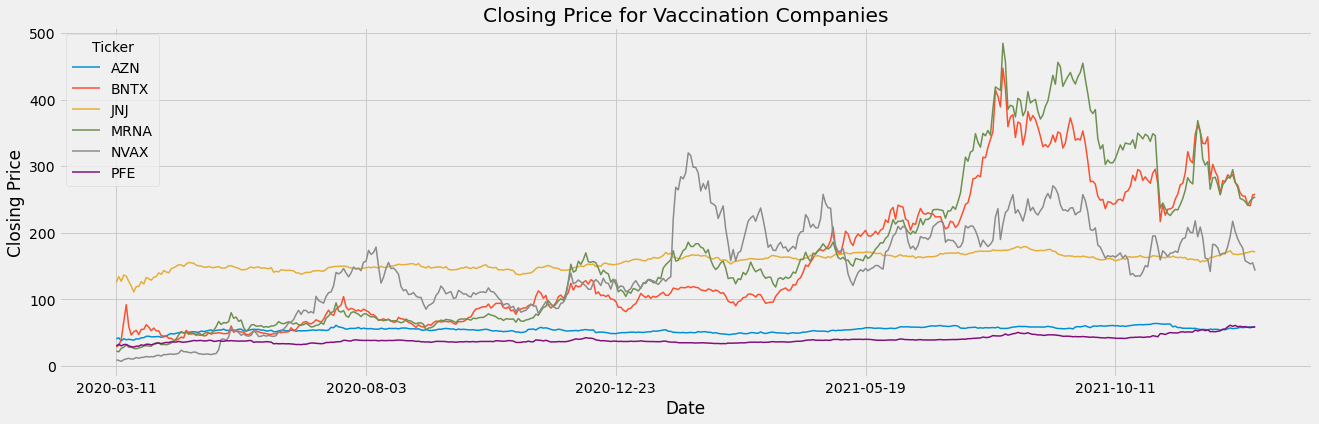

In [123]:
plt.rcParams["figure.figsize"] = (20,6)
close.plot(xlabel = "Date", ylabel = "Closing Price", title = "Closing Price for Vaccination Companies", linewidth = 1.5)

In [127]:
# Loading S5HLTH Index file.

s5health = pd.read_csv("datasets_complete/S5HLTH INDEX.csv", header = None)
s5health.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,9/11/89 0:00,66.34,66.34,66.34,66.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9/12/89 0:00,66.29,66.29,66.29,66.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9/13/89 0:00,65.81,65.81,65.81,65.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9/14/89 0:00,65.23,65.23,65.23,65.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9/15/89 0:00,65.70,65.70,65.70,65.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
# Clean up s5health file (Column order: Open, High, Low, Close)

health = s5health[[0,1,2,3,4]].rename(columns = {0: "Date", 1:"Open", 2:"High", 3:"Low", 4:"Close"})

In [139]:
health

,Date,Open,High,Low,Close
0,9/11/89 0:00,66.34,66.34,66.34,66.34
1,9/12/89 0:00,66.29,66.29,66.29,66.29
2,9/13/89 0:00,65.81,65.81,65.81,65.81
3,9/14/89 0:00,65.23,65.23,65.23,65.23
4,9/15/89 0:00,65.70,65.70,65.70,65.70
...,...,...,...,...,...
8140,12/29/21 0:00,1637.96,1651.03,1637.04,1647.76
8141,12/30/21 0:00,1647.80,1656.82,1647.80,1650.43
8142,12/31/21 0:00,1649.74,1655.56,1643.85,1643.92
8143,1/3/22 0:00,1643.17,1643.17,1614.36,1627.82


In [165]:
close.reset_index().merge(health[['Close','Date']], how="inner", on = "Date")

# Needs to clean up the date column in health file. (Need to be in the same format?)
# WIP...

,Date,AZN,BNTX,JNJ,MRNA,NVAX,PFE,Close


## Overview of transaction for vaccination companies

<AxesSubplot:title={'center':'Number of Transactions for Vaccination Companies'}, xlabel='Date', ylabel='Number of Transactions'>

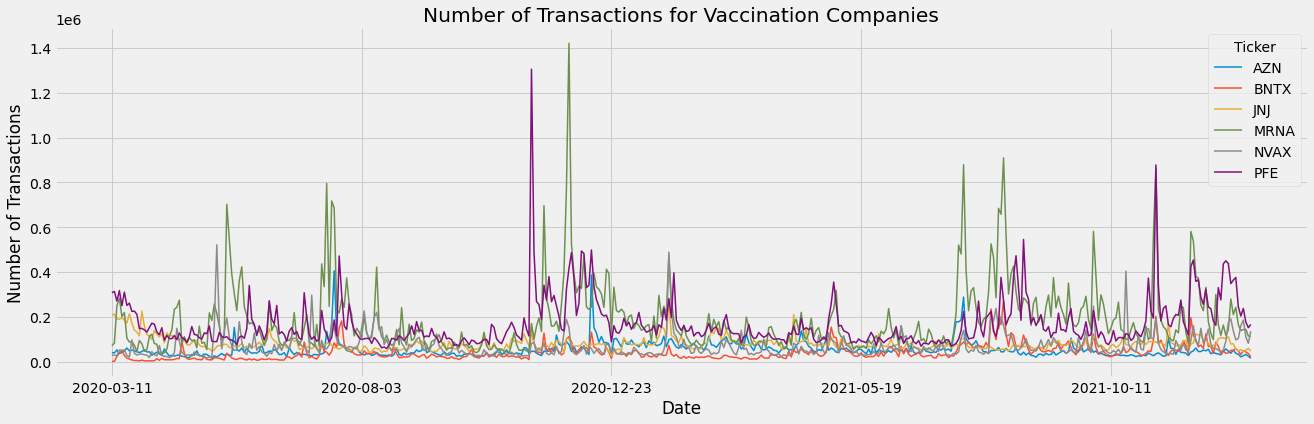

In [122]:
plt.rcParams["figure.figsize"] = (20,6)
transactions.plot(xlabel = "Date", ylabel = "Number of Transactions", title = "Number of Transactions for Vaccination Companies", linewidth = 1.5)